In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix

##**1: Loading the Dataset**

In [2]:
df= pd.read_csv('./dataset.csv')

In [3]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [4]:
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

##**2: Preprocessing the Dataset**

In [5]:
df.dtypes


f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

As some of the features are of 'object' data type, first, we will convert them to numerical. Then we can check for nulls and treat them accordingly

In [6]:
df['f1'] = pd.to_numeric(df['f1'], errors = 'coerce')
df['f2'] = pd.to_numeric(df['f2'], errors = 'coerce')
df['f4'] = pd.to_numeric(df['f4'], errors = 'coerce')
df['f5'] = pd.to_numeric(df['f5'], errors = 'coerce')
df['f6'] = pd.to_numeric(df['f6'], errors = 'coerce')
df['f7'] = pd.to_numeric(df['f7'], errors = 'coerce')

In [7]:
df.dtypes

f1        float64
f2        float64
f3          int64
f4        float64
f5        float64
f6        float64
f7        float64
target      int64
dtype: object

In [8]:
df.isnull().sum()

f1        1
f2        1
f3        0
f4        1
f5        1
f6        1
f7        1
target    0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


### Scaling the data and Splitting it into train - test sets

In [11]:
df.reset_index(drop = True)

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1
...,...,...,...,...,...,...,...,...
755,1.0,128.0,88,39.0,110.0,36.5,1.057,1
756,7.0,137.0,90,41.0,0.0,32.0,0.391,0
757,0.0,123.0,72,0.0,0.0,36.3,0.258,1
758,1.0,106.0,76,0.0,0.0,37.5,0.197,0


In [12]:
X = df.iloc[:,:-1]
y = df['target']

In [13]:
sca = StandardScaler()
X = sca.fit_transform(X)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=22)

In [15]:
y_train= np.asarray(y_train).astype('float32').reshape((-1,1))
y_test= np.asarray(y_test).astype('float32').reshape((-1,1))

In [16]:
# sca = StandardScaler()
# X_train = sca.fit_transform(X_train)
# X_test = sca.transform(X_test)

##Building of Neural Network

In [17]:
model = Sequential()
model.add(Dense(8,input_dim=7,activation="relu")) #input layer
model.add(Dense(5,activation='relu')) #hidden layer 1

model.add(Dense(3,activation='relu')) #hidden layer 2
model.add(Dense(1,activation='sigmoid')) #output layer

##1. Setting up the training Loop

In [18]:

def train_loop(X,y,loss,optimizer,batch,num_of_epochs,model,val_split):
  num_of_batches=len(X)//batch

  trainLossValues = []
  valLossValues = []
  
  trainAccValues = []
  valAccValues = []


  #spliting the data for validation
  index_= int(len(X)*(1-val_split))
  X_t,y_t=X[:index_],y[:index_]
  X_validation,y_validation=X[index_:],y[index_:]
  for epoch in range(num_of_epochs):
    for b in range(num_of_batches):
      X_batch=X_t[(b*batch):((b+1)*batch)]
      y_batch=y_t[(b*batch):((b+1)*batch)]
      with tf.GradientTape() as grad_t:
        y_pred=model(X_batch)
        loss_val= loss(y_batch,y_pred)
      grads=grad_t.gradient(loss_val,model.trainable_variables)
      optimizer.apply_gradients(zip(grads,model.trainable_variables))
    train_loss = loss(y_t,model.predict(X_t))
    validation_loss=loss(y_validation,model.predict(X_validation))
    trainLossValues.append(train_loss)
    valLossValues.append(validation_loss)

    #Calculating accuracies
    y_pred_train = model.predict(X_t)
    y_pred_labels = (y_pred_train >= 0.5).astype(int)
    train_accuracy = accuracy_score(y_t, y_pred_labels)

    y_pred_val = model.predict(X_validation)
    y_pred_val_labels = (y_pred_val >= 0.5).astype(int)
    validation_accuracy = accuracy_score(y_validation, y_pred_val_labels)

    trainAccValues.append(train_accuracy)
    valAccValues.append(validation_accuracy)

    



    print(f'epoch: {epoch}, training loss: {train_loss}, validation loss: {validation_loss}, training accuracy: {train_accuracy}, validation accuracy: {validation_accuracy}')
  return trainLossValues, valLossValues, trainAccValues, valAccValues

##2 Define the loss function


In [19]:
loss= BinaryCrossentropy()

##3. Choose an optimizer and a learning rate

In [20]:
lr = 0.01
optimizer = SGD(learning_rate=lr)

## Training the neural network

In [21]:

num_epochs = 500
batch_size = 64

In [22]:
trainLossValues, valLossValues, trainAccValues, valAccValues = train_loop(X_train,y_train,loss,optimizer,batch_size,num_epochs,model,0.2)

5/5 [==============================] - 0s 3ms/step
epoch: 0, training loss: 0.6846888661384583, validation loss: 0.6784104108810425, training accuracy: 0.660472972972973, validation accuracy: 0.6756756756756757
5/5 [==============================] - 0s 3ms/step
epoch: 1, training loss: 0.682776689529419, validation loss: 0.6763990521430969, training accuracy: 0.6537162162162162, validation accuracy: 0.6621621621621622
5/5 [==============================] - 0s 3ms/step
epoch: 2, training loss: 0.6809849143028259, validation loss: 0.6745022535324097, training accuracy: 0.6503378378378378, validation accuracy: 0.6621621621621622
5/5 [==============================] - 0s 2ms/step
epoch: 3, training loss: 0.6793035864830017, validation loss: 0.6727182269096375, training accuracy: 0.6486486486486487, validation accuracy: 0.6621621621621622
5/5 [==============================] - 0s 1ms/step
epoch: 4, training loss: 0.6777190566062927, validation loss: 0.6710323095321655, training accuracy: 0.

5/5 [==============================] - 0s 1ms/step
epoch: 22, training loss: 0.6592887043952942, validation loss: 0.6513088345527649, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 0s/step
epoch: 23, training loss: 0.6586189270019531, validation loss: 0.6505765914916992, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 1ms/step
epoch: 24, training loss: 0.6579663157463074, validation loss: 0.6498624682426453, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 2ms/step
epoch: 25, training loss: 0.657335638999939, validation loss: 0.6491684913635254, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 2ms/step
epoch: 26, training loss: 0.6567244529724121, validation loss: 0.6484891772270203, training accurac

5/5 [==============================] - 0s 0s/step
epoch: 44, training loss: 0.6474385857582092, validation loss: 0.6379300951957703, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 0s/step
epoch: 45, training loss: 0.6469648480415344, validation loss: 0.6373918056488037, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 2ms/step
epoch: 46, training loss: 0.6464897990226746, validation loss: 0.6368435025215149, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 2ms/step
epoch: 47, training loss: 0.646014928817749, validation loss: 0.6362894773483276, training accuracy: 0.6486486486486487, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 4ms/step
epoch: 48, training loss: 0.6455382108688354, validation loss: 0.6357386112213135, training accuracy

5/5 [==============================] - 0s 1ms/step
epoch: 66, training loss: 0.6356370449066162, validation loss: 0.6244511604309082, training accuracy: 0.6503378378378378, validation accuracy: 0.6554054054054054
5/5 [==============================] - 0s 2ms/step
epoch: 67, training loss: 0.6350259780883789, validation loss: 0.6237653493881226, training accuracy: 0.6503378378378378, validation accuracy: 0.6621621621621622
5/5 [==============================] - 0s 0s/step
epoch: 68, training loss: 0.6344095468521118, validation loss: 0.623066782951355, training accuracy: 0.652027027027027, validation accuracy: 0.6621621621621622
5/5 [==============================] - 0s 2ms/step
epoch: 69, training loss: 0.633773922920227, validation loss: 0.6223457455635071, training accuracy: 0.652027027027027, validation accuracy: 0.6621621621621622
5/5 [==============================] - 0s 0s/step
epoch: 70, training loss: 0.6331243515014648, validation loss: 0.621623158454895, training accuracy: 0.

5/5 [==============================] - 0s 2ms/step
epoch: 88, training loss: 0.6197202801704407, validation loss: 0.6068212985992432, training accuracy: 0.6773648648648649, validation accuracy: 0.6959459459459459
5/5 [==============================] - 0s 2ms/step
epoch: 89, training loss: 0.6188634037971497, validation loss: 0.6058977246284485, training accuracy: 0.6773648648648649, validation accuracy: 0.6959459459459459
5/5 [==============================] - 0s 4ms/step
epoch: 90, training loss: 0.617998480796814, validation loss: 0.6049612164497375, training accuracy: 0.6756756756756757, validation accuracy: 0.6959459459459459
5/5 [==============================] - 0s 2ms/step
epoch: 91, training loss: 0.6171217560768127, validation loss: 0.604015052318573, training accuracy: 0.6756756756756757, validation accuracy: 0.6959459459459459
5/5 [==============================] - 0s 0s/step
epoch: 92, training loss: 0.6162228584289551, validation loss: 0.6030463576316833, training accuracy

5/5 [==============================] - 0s 2ms/step
epoch: 110, training loss: 0.5960150957107544, validation loss: 0.5829700231552124, training accuracy: 0.6942567567567568, validation accuracy: 0.7162162162162162
5/5 [==============================] - 0s 0s/step
epoch: 111, training loss: 0.594654381275177, validation loss: 0.5817223787307739, training accuracy: 0.6993243243243243, validation accuracy: 0.7162162162162162
5/5 [==============================] - 0s 884us/step
epoch: 112, training loss: 0.5932719111442566, validation loss: 0.5804694890975952, training accuracy: 0.7010135135135135, validation accuracy: 0.7162162162162162
5/5 [==============================] - 0s 4ms/step
epoch: 113, training loss: 0.5918418169021606, validation loss: 0.5792004466056824, training accuracy: 0.7027027027027027, validation accuracy: 0.722972972972973
5/5 [==============================] - 0s 4ms/step
epoch: 114, training loss: 0.5903786420822144, validation loss: 0.5778980851173401, training a

5/5 [==============================] - 0s 2ms/step
epoch: 132, training loss: 0.5608137845993042, validation loss: 0.5524498820304871, training accuracy: 0.7212837837837838, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 0s/step
epoch: 133, training loss: 0.5591577887535095, validation loss: 0.5509964227676392, training accuracy: 0.7212837837837838, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 2ms/step
epoch: 134, training loss: 0.5575257539749146, validation loss: 0.5495672225952148, training accuracy: 0.722972972972973, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 4ms/step
epoch: 135, training loss: 0.5559148192405701, validation loss: 0.5481644868850708, training accuracy: 0.7212837837837838, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 2ms/step
epoch: 136, training loss: 0.5543269515037537, validation loss: 0.5467750430107117, training ac

5/5 [==============================] - 0s 1ms/step
epoch: 154, training loss: 0.5282419919967651, validation loss: 0.5250768065452576, training accuracy: 0.7381756756756757, validation accuracy: 0.7635135135135135
5/5 [==============================] - 0s 4ms/step
epoch: 155, training loss: 0.5269803404808044, validation loss: 0.5240732431411743, training accuracy: 0.7381756756756757, validation accuracy: 0.7635135135135135
5/5 [==============================] - 0s 0s/step
epoch: 156, training loss: 0.5257408618927002, validation loss: 0.5230857133865356, training accuracy: 0.7381756756756757, validation accuracy: 0.7635135135135135
5/5 [==============================] - 0s 2ms/step
epoch: 157, training loss: 0.5245279669761658, validation loss: 0.522117555141449, training accuracy: 0.7398648648648649, validation accuracy: 0.7635135135135135
5/5 [==============================] - 0s 0s/step
epoch: 158, training loss: 0.5233491063117981, validation loss: 0.5211896896362305, training acc

5/5 [==============================] - 0s 2ms/step
epoch: 176, training loss: 0.5058829188346863, validation loss: 0.5081003308296204, training accuracy: 0.7567567567567568, validation accuracy: 0.7905405405405406
5/5 [==============================] - 0s 0s/step
epoch: 177, training loss: 0.5051282644271851, validation loss: 0.507596492767334, training accuracy: 0.7567567567567568, validation accuracy: 0.7905405405405406
5/5 [==============================] - 0s 2ms/step
epoch: 178, training loss: 0.5043723583221436, validation loss: 0.5070948004722595, training accuracy: 0.7550675675675675, validation accuracy: 0.7905405405405406
5/5 [==============================] - 0s 0s/step
epoch: 179, training loss: 0.5036231279373169, validation loss: 0.5066038370132446, training accuracy: 0.7550675675675675, validation accuracy: 0.7905405405405406
5/5 [==============================] - 0s 4ms/step
epoch: 180, training loss: 0.5028609037399292, validation loss: 0.5061092972755432, training acc

5/5 [==============================] - 0s 2ms/step
epoch: 198, training loss: 0.49075111746788025, validation loss: 0.5002935528755188, training accuracy: 0.7668918918918919, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 4ms/step
epoch: 199, training loss: 0.4901553988456726, validation loss: 0.5001395344734192, training accuracy: 0.7652027027027027, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 349us/step
epoch: 200, training loss: 0.48959702253341675, validation loss: 0.49999669194221497, training accuracy: 0.7652027027027027, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 1ms/step
epoch: 201, training loss: 0.48906010389328003, validation loss: 0.4998714327812195, training accuracy: 0.7635135135135135, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 1ms/step
epoch: 202, training loss: 0.48852720856666565, validation loss: 0.4997693598270416, traini

5/5 [==============================] - 0s 0s/step
epoch: 220, training loss: 0.4808160960674286, validation loss: 0.4997522532939911, training accuracy: 0.7668918918918919, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 2ms/step
epoch: 221, training loss: 0.4804534316062927, validation loss: 0.4998234510421753, training accuracy: 0.7668918918918919, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 2ms/step
epoch: 222, training loss: 0.4801097512245178, validation loss: 0.49988359212875366, training accuracy: 0.7635135135135135, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 2ms/step
epoch: 223, training loss: 0.47976353764533997, validation loss: 0.4999431371688843, training accuracy: 0.7635135135135135, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 3ms/step
epoch: 224, training loss: 0.4794388711452484, validation loss: 0.5000160932540894, training

5/5 [==============================] - 0s 0s/step
epoch: 242, training loss: 0.47456854581832886, validation loss: 0.5017573237419128, training accuracy: 0.7584459459459459, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 4ms/step
epoch: 243, training loss: 0.4743345081806183, validation loss: 0.5018598437309265, training accuracy: 0.7584459459459459, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 4ms/step
epoch: 244, training loss: 0.47412073612213135, validation loss: 0.5019654035568237, training accuracy: 0.7584459459459459, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 4ms/step
epoch: 245, training loss: 0.47389286756515503, validation loss: 0.5020546913146973, training accuracy: 0.7584459459459459, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 0s/step
epoch: 246, training loss: 0.4736896753311157, validation loss: 0.5021632313728333, training

5/5 [==============================] - 0s 1ms/step
epoch: 264, training loss: 0.4703388810157776, validation loss: 0.5044854283332825, training accuracy: 0.7635135135135135, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 2ms/step
epoch: 265, training loss: 0.4701857268810272, validation loss: 0.5046335458755493, training accuracy: 0.7635135135135135, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 0s/step
epoch: 266, training loss: 0.4700178802013397, validation loss: 0.5047937631607056, training accuracy: 0.7635135135135135, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 2ms/step
epoch: 267, training loss: 0.4698583781719208, validation loss: 0.5049376487731934, training accuracy: 0.7635135135135135, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 0s/step
epoch: 268, training loss: 0.4696962535381317, validation loss: 0.5050956010818481, training accura

5/5 [==============================] - 0s 0s/step
epoch: 286, training loss: 0.46719643473625183, validation loss: 0.5077524781227112, training accuracy: 0.768581081081081, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 0s/step
epoch: 287, training loss: 0.46706897020339966, validation loss: 0.507888913154602, training accuracy: 0.768581081081081, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 4ms/step
epoch: 288, training loss: 0.46692946553230286, validation loss: 0.5080491304397583, training accuracy: 0.768581081081081, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 0s/step
epoch: 289, training loss: 0.46680131554603577, validation loss: 0.5081988573074341, training accuracy: 0.7702702702702703, validation accuracy: 0.777027027027027
5/5 [==============================] - 0s 0s/step
epoch: 290, training loss: 0.4666706919670105, validation loss: 0.5083572864532471, training accuracy

5/5 [==============================] - 0s 4ms/step
epoch: 308, training loss: 0.4644903838634491, validation loss: 0.5109992027282715, training accuracy: 0.7702702702702703, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 0s/step
epoch: 309, training loss: 0.4643801152706146, validation loss: 0.5111346244812012, training accuracy: 0.7702702702702703, validation accuracy: 0.7702702702702703
5/5 [==============================] - 0s 0s/step
epoch: 310, training loss: 0.46426793932914734, validation loss: 0.5112983584403992, training accuracy: 0.7702702702702703, validation accuracy: 0.7635135135135135
5/5 [==============================] - 0s 0s/step
epoch: 311, training loss: 0.46416276693344116, validation loss: 0.5114359259605408, training accuracy: 0.7702702702702703, validation accuracy: 0.7635135135135135
5/5 [==============================] - 0s 185us/step
epoch: 312, training loss: 0.46403977274894714, validation loss: 0.5115795731544495, trainin

5/5 [==============================] - 0s 4ms/step
epoch: 331, training loss: 0.46201643347740173, validation loss: 0.5140199661254883, training accuracy: 0.7652027027027027, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 0s/step
epoch: 332, training loss: 0.4619022011756897, validation loss: 0.5141676664352417, training accuracy: 0.7652027027027027, validation accuracy: 0.75
5/5 [==============================] - 0s 1ms/step
epoch: 333, training loss: 0.46180886030197144, validation loss: 0.5142962336540222, training accuracy: 0.7652027027027027, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 0s/step
epoch: 334, training loss: 0.4617089033126831, validation loss: 0.5144507884979248, training accuracy: 0.7652027027027027, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 0s/step
epoch: 335, training loss: 0.46160879731178284, validation loss: 0.5145742297172546, training accuracy: 0.76

5/5 [==============================] - 0s 4ms/step
epoch: 353, training loss: 0.4599749445915222, validation loss: 0.5165700912475586, training accuracy: 0.7668918918918919, validation accuracy: 0.75
5/5 [==============================] - 0s 0s/step
epoch: 354, training loss: 0.45989200472831726, validation loss: 0.5166540145874023, training accuracy: 0.7668918918918919, validation accuracy: 0.75
5/5 [==============================] - 0s 0s/step
epoch: 355, training loss: 0.45980480313301086, validation loss: 0.5167421698570251, training accuracy: 0.7668918918918919, validation accuracy: 0.75
5/5 [==============================] - 0s 0s/step
epoch: 356, training loss: 0.4597252607345581, validation loss: 0.5168056488037109, training accuracy: 0.7668918918918919, validation accuracy: 0.75
5/5 [==============================] - 0s 4ms/step
epoch: 357, training loss: 0.4596485495567322, validation loss: 0.5169004201889038, training accuracy: 0.7668918918918919, validation accuracy: 0.75
5

5/5 [==============================] - 0s 2ms/step
epoch: 376, training loss: 0.45819091796875, validation loss: 0.5182815790176392, training accuracy: 0.768581081081081, validation accuracy: 0.75
5/5 [==============================] - 0s 0s/step
epoch: 377, training loss: 0.4581107199192047, validation loss: 0.5183509588241577, training accuracy: 0.768581081081081, validation accuracy: 0.75
5/5 [==============================] - 0s 2ms/step
epoch: 378, training loss: 0.45803698897361755, validation loss: 0.5183900594711304, training accuracy: 0.768581081081081, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 2ms/step
epoch: 379, training loss: 0.4579668939113617, validation loss: 0.5184603333473206, training accuracy: 0.7702702702702703, validation accuracy: 0.7567567567567568
5/5 [==============================] - 0s 3ms/step
epoch: 380, training loss: 0.4578841030597687, validation loss: 0.518519937992096, training accuracy: 0.7702702702702703, vali

epoch: 398, training loss: 0.4566165804862976, validation loss: 0.5192815661430359, training accuracy: 0.7736486486486487, validation accuracy: 0.75
5/5 [==============================] - 0s 2ms/step
epoch: 399, training loss: 0.45655566453933716, validation loss: 0.5193098783493042, training accuracy: 0.7736486486486487, validation accuracy: 0.75
5/5 [==============================] - 0s 0s/step
epoch: 400, training loss: 0.4564899802207947, validation loss: 0.5193528532981873, training accuracy: 0.7736486486486487, validation accuracy: 0.75
5/5 [==============================] - 0s 5ms/step
epoch: 401, training loss: 0.45642995834350586, validation loss: 0.519386351108551, training accuracy: 0.7736486486486487, validation accuracy: 0.75
5/5 [==============================] - 0s 4ms/step
epoch: 402, training loss: 0.4563533663749695, validation loss: 0.5194345712661743, training accuracy: 0.7736486486486487, validation accuracy: 0.75
5/5 [==============================] - 0s 4ms/step


5/5 [==============================] - 0s 2ms/step
epoch: 421, training loss: 0.45522838830947876, validation loss: 0.5200684070587158, training accuracy: 0.7753378378378378, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 422, training loss: 0.45517241954803467, validation loss: 0.5201204419136047, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 423, training loss: 0.45510244369506836, validation loss: 0.5201630592346191, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 0s/step
epoch: 424, training loss: 0.45505291223526, validation loss: 0.5201933979988098, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 4ms/step
epoch: 425, training loss: 0.4549967646598816, validation loss: 0.5202404260635376, training 

5/5 [==============================] - 0s 2ms/step
epoch: 443, training loss: 0.45391133427619934, validation loss: 0.5209586024284363, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 444, training loss: 0.4538601040840149, validation loss: 0.520976722240448, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 4ms/step
epoch: 445, training loss: 0.4537894129753113, validation loss: 0.5210238099098206, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 446, training loss: 0.4537287950515747, validation loss: 0.5210596323013306, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 447, training loss: 0.453669935464859, validation loss: 0.5210857391357422, training a

5/5 [==============================] - 0s 2ms/step
epoch: 465, training loss: 0.45252636075019836, validation loss: 0.5217791795730591, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 270us/step
epoch: 466, training loss: 0.4524509906768799, validation loss: 0.5218172073364258, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 467, training loss: 0.4523961842060089, validation loss: 0.5218324065208435, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 4ms/step
epoch: 468, training loss: 0.45231932401657104, validation loss: 0.5218707919120789, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 0s/step
epoch: 469, training loss: 0.452266126871109, validation loss: 0.521917998790741, training

5/5 [==============================] - 0s 0s/step
epoch: 487, training loss: 0.45114362239837646, validation loss: 0.5226516723632812, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 488, training loss: 0.45108893513679504, validation loss: 0.522692084312439, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 2ms/step
epoch: 489, training loss: 0.4510246515274048, validation loss: 0.5227360725402832, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 0s/step
epoch: 490, training loss: 0.4509652554988861, validation loss: 0.5228015780448914, training accuracy: 0.7736486486486487, validation accuracy: 0.7432432432432432
5/5 [==============================] - 0s 0s/step
epoch: 491, training loss: 0.45090407133102417, validation loss: 0.5228508114814758, training a

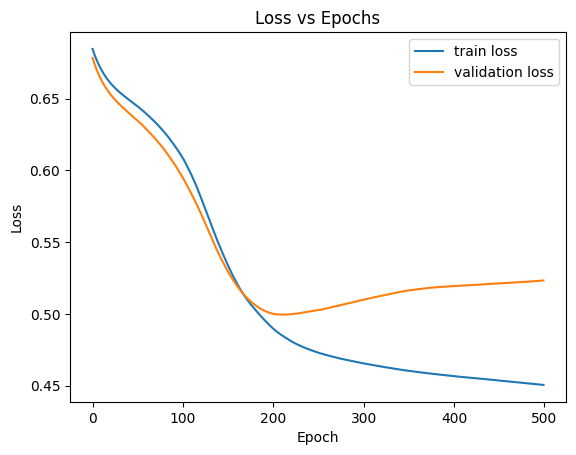

In [23]:
plt.plot(trainLossValues, label='train loss')
plt.plot(valLossValues, label='validation loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

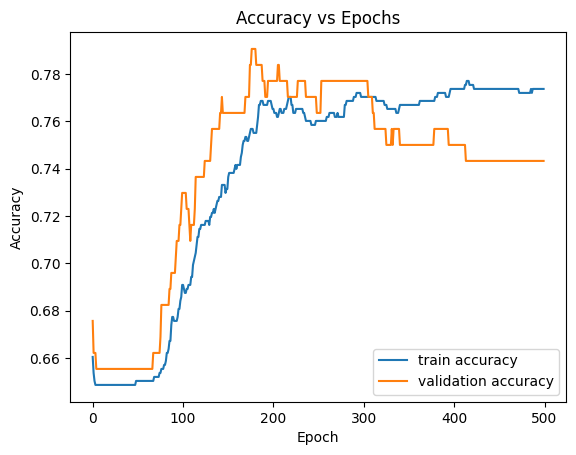

In [24]:
plt.plot(trainAccValues, label='train accuracy')
plt.plot(valAccValues, label='validation accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
# Evaluating model on test data
y_pred_test = model.predict(X_test)
y_pred_test_labels = (y_pred_test >= 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_test_labels)
test_accuracy

1/1 [==============================] - 0s 29ms/step


0.8

<h1>Deployment</h1>


##6. Save the weights of the trained neural network



In [26]:
model.save_weights('weights.h5')

In [27]:
file = open('nn_model.pkl', 'wb')
pickle.dump(model, file)